In [45]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [46]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [47]:
df =  pd.read_csv('MainData.csv', encoding='cp949')
df = df.dropna()
df

,자치구명,층,임대면적,보증금,계약일,건축년도,임대건물명,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수
0,광진구,15,59.95,31000,2014-01-04,1996,아파트,28310,0.50,64.0,2,77.90,3.32,93.73,"1,937.00",-4.5
1,서대문구,1,37.48,8000,2014-01-07,1993,단독/다가구,28505,1.25,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
2,관악구,1,58.18,9300,2014-01-08,1978,단독/다가구,28505,1.00,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
3,동작구,1,77.36,10000,2014-01-18,1991,단독/다가구,28505,1.25,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
4,성북구,1,29.46,4500,2014-01-25,1990,다세대/연립,28310,0.50,64.2,2,77.90,3.32,93.73,"1,937.00",-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438132,용산구,5,101.95,40000,2022-05-06,1971,아파트,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3
438133,동작구,3,38.12,36000,2022-05-06,2015,다세대/연립,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3
438134,동작구,1,31.71,22050,2022-05-06,2014,다세대/연립,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3
438135,강동구,10,15.94,13650,2022-05-06,2012,아파트,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3


In [48]:
df.index = df['계약일']
df = df.drop(['계약일'], axis = 1)
df

,자치구명,층,임대면적,보증금,건축년도,임대건물명,경제활동인구,기준금리,전세가격비율,정책성향,아파트매매실거래지수,회사채수익률,소비자물가지수,통화량,광공업지수
계약일,,,,,,,,,,,,,,,
2014-01-04,광진구,15,59.95,31000,1996,아파트,28310,0.50,64.0,2,77.90,3.32,93.73,"1,937.00",-4.5
2014-01-07,서대문구,1,37.48,8000,1993,단독/다가구,28505,1.25,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
2014-01-08,관악구,1,58.18,9300,1978,단독/다가구,28505,1.00,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
2014-01-18,동작구,1,77.36,10000,1991,단독/다가구,28505,1.25,63.3,2,77.90,3.32,93.73,"1,937.00",-4.5
2014-01-25,성북구,1,29.46,4500,1990,다세대/연립,28310,0.50,64.2,2,77.90,3.32,93.73,"1,937.00",-4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-06,용산구,5,101.95,40000,1971,아파트,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3
2022-05-06,동작구,3,38.12,36000,2015,다세대/연립,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3
2022-05-06,동작구,1,31.71,22050,2014,다세대/연립,28310,0.50,65.0,1,175.55,3.63,107.56,"3,656.10",3.3


In [49]:
df = df.loc[df['임대건물명'] == '아파트'].dropna()
#다세대/연립
#단독/다가구
#아파트
#오피스텔

<AxesSubplot:xlabel='계약일'>

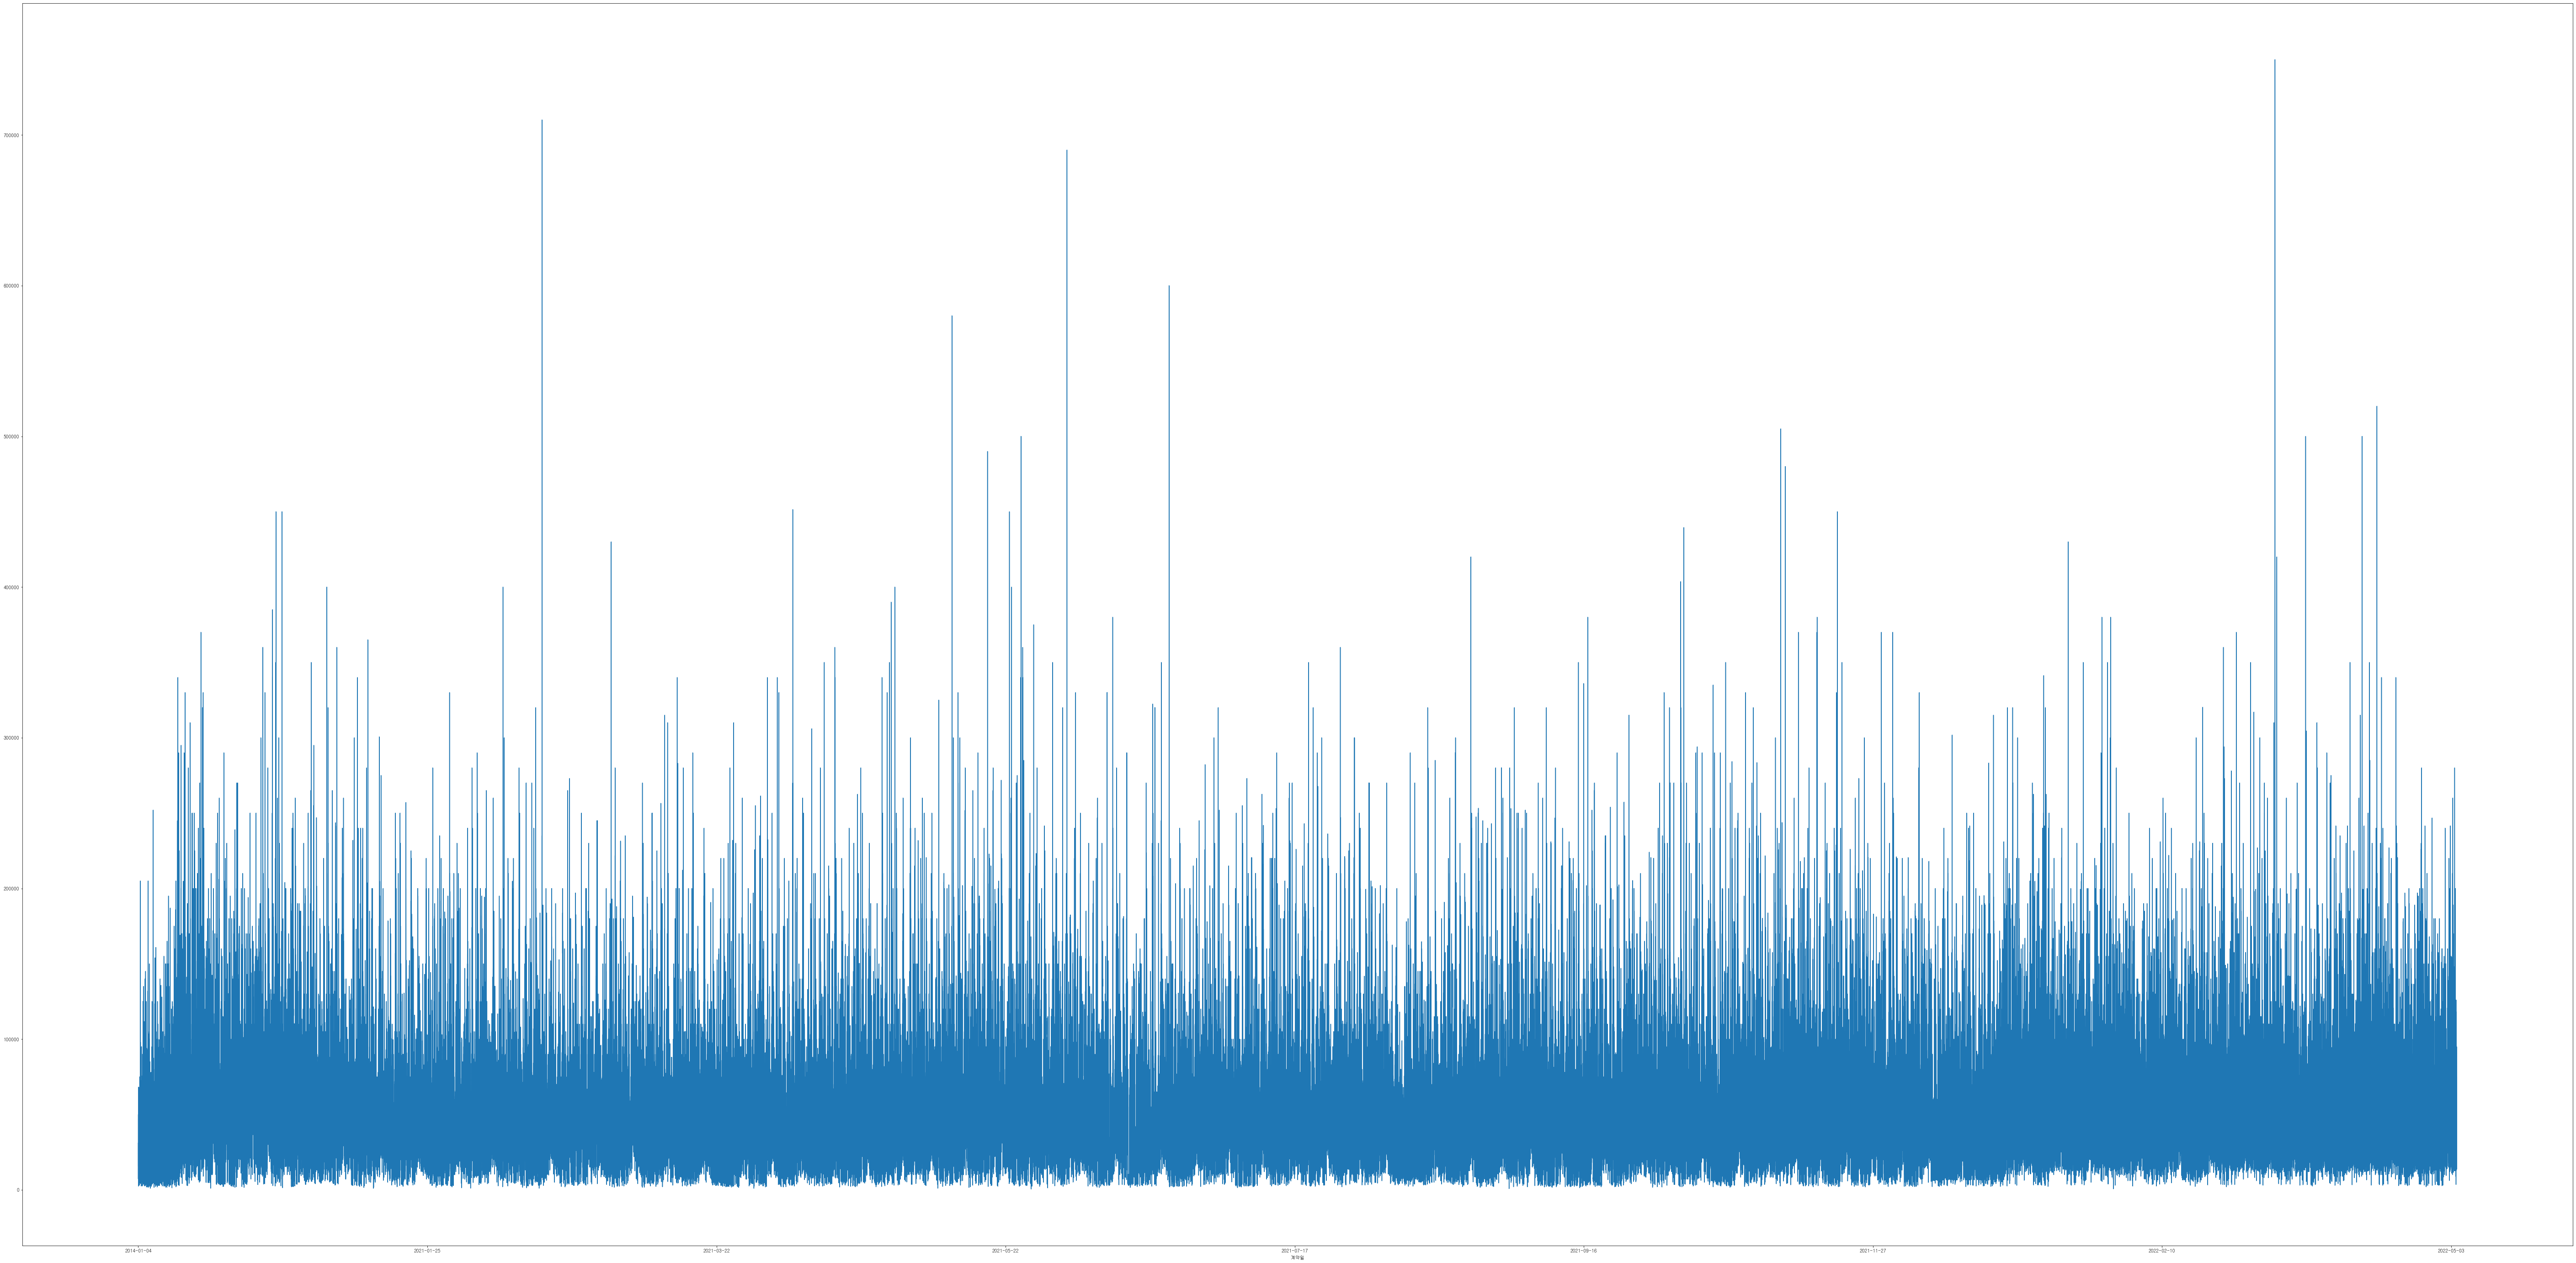

In [50]:
plt.figure(figsize=(100,50))
df['보증금'].plot()

In [51]:
cycle, trend = sm.tsa.filters.hpfilter(df['보증금'], 1600)

<AxesSubplot:xlabel='계약일'>

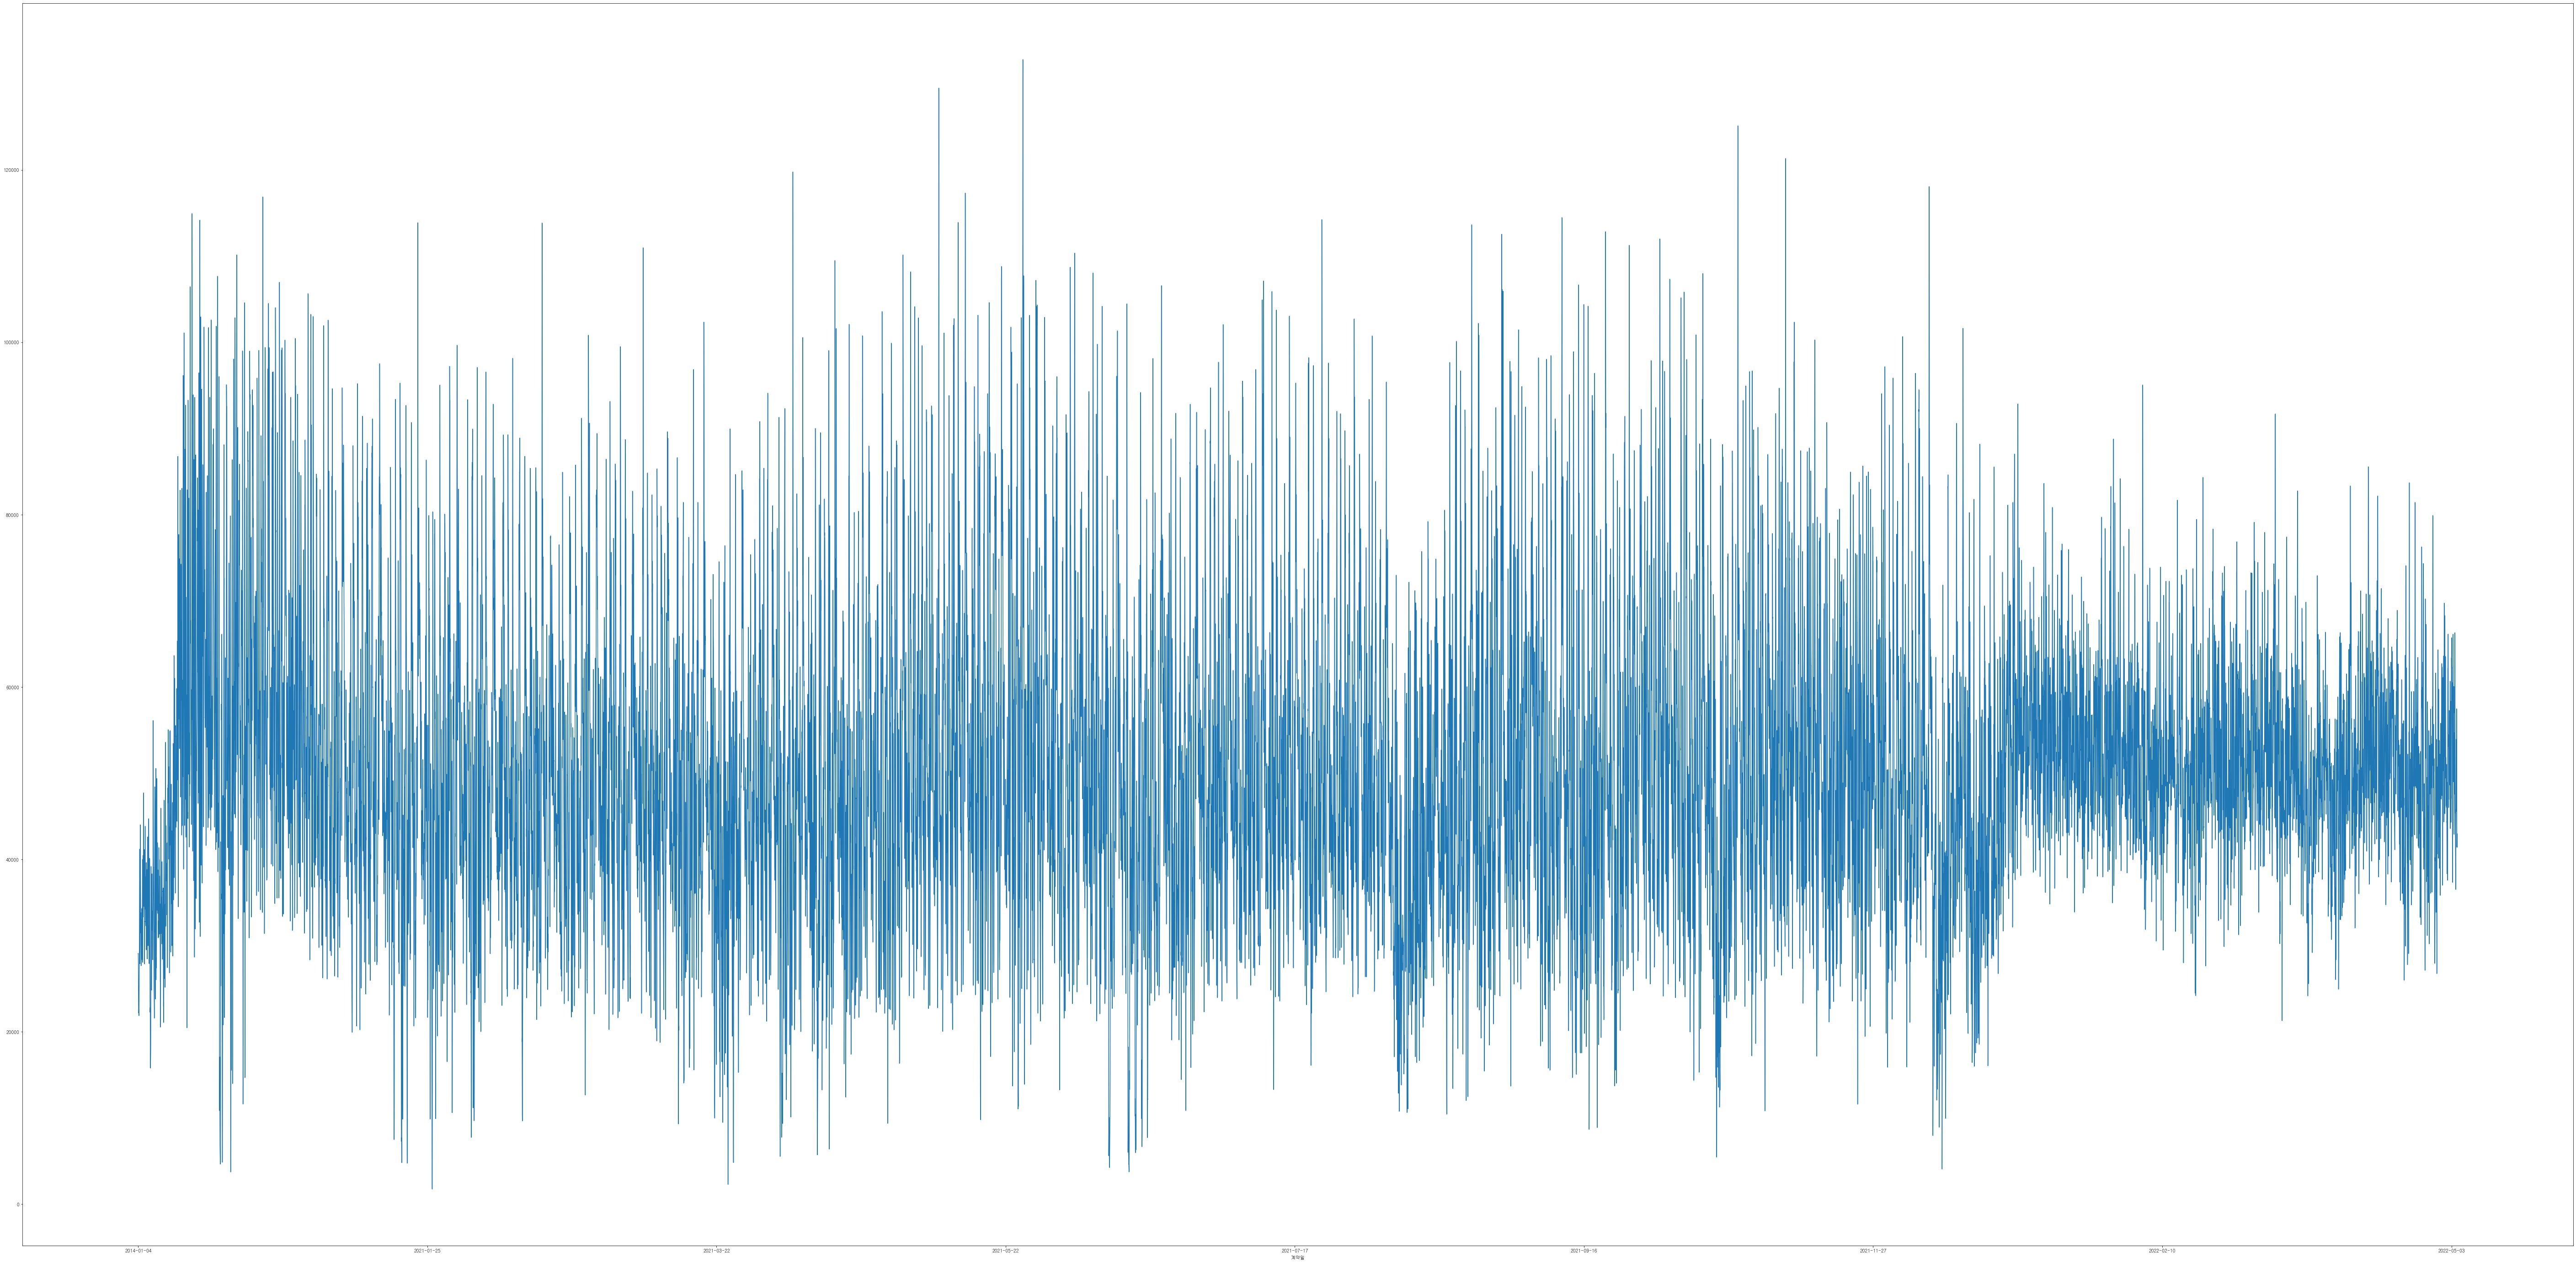

In [52]:
plt.figure(figsize=(100,50))
trend.plot()

In [53]:
df["trend"] = trend

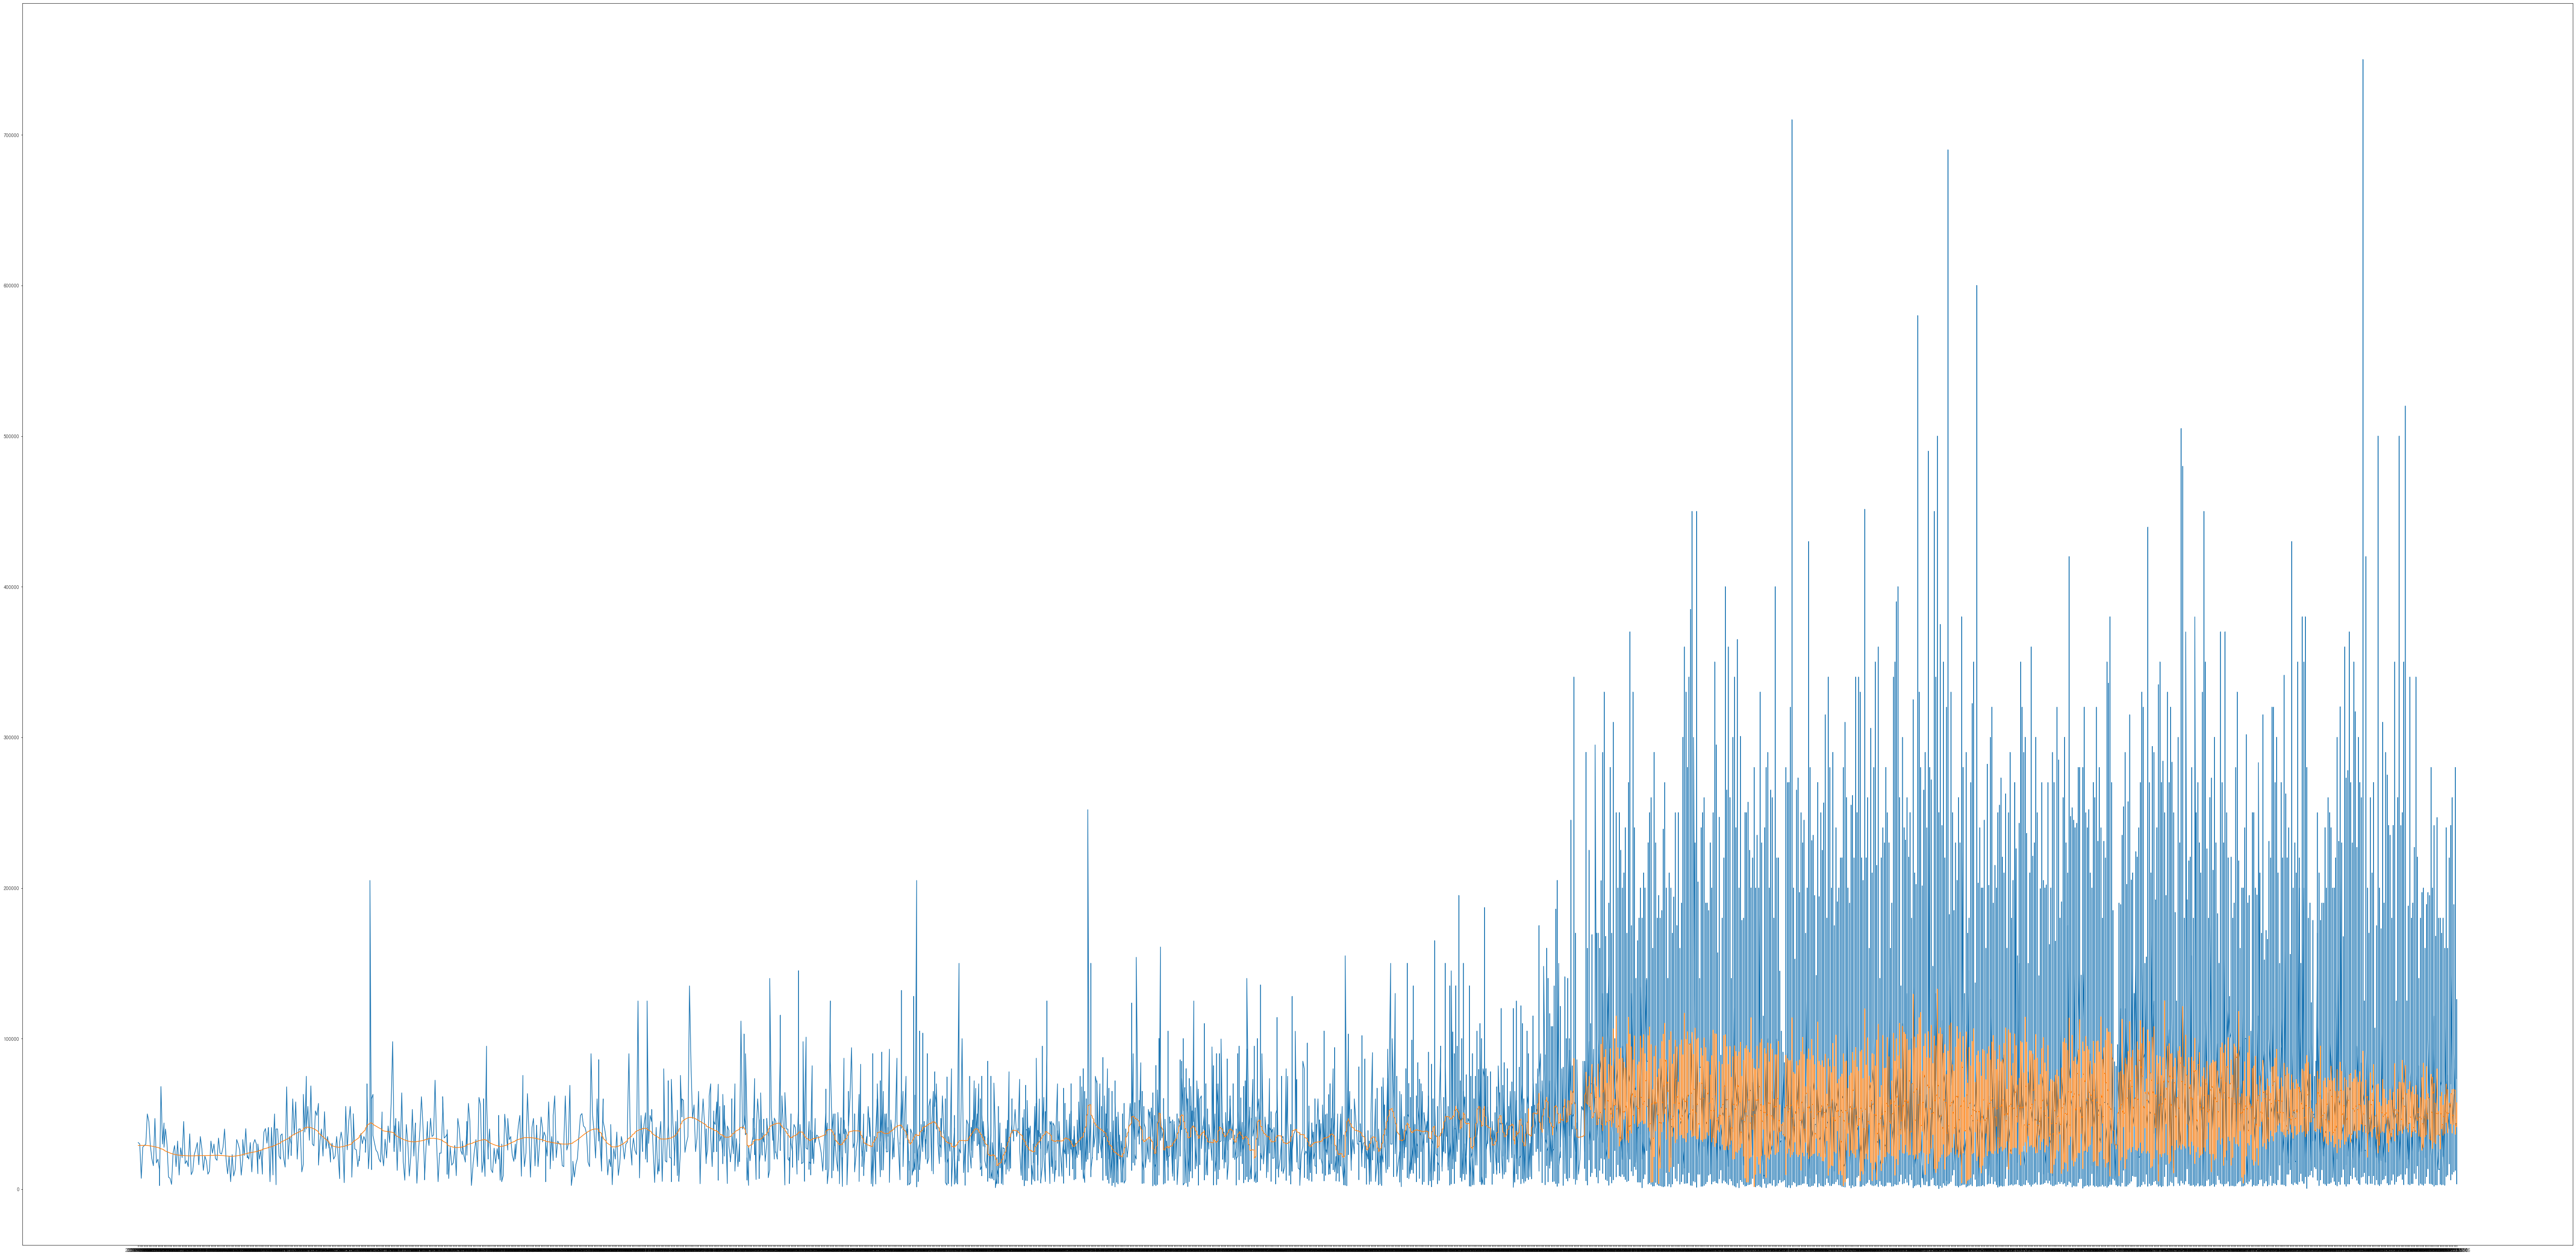

In [54]:
plt.figure(figsize=(100,50))
plt.plot(df[["보증금",'trend']])

In [55]:
df.to_csv('FilterData_APT.csv',encoding='cp949')